**Name**: Wilma C. Alemios

**SN**: 201908229

**Class**: THQ2

**Task**: Make your HDC model!

Have fun doing this exercise! 💓

---

# Hyperdimensional Computing

In this programming exercise, you will make an HDC model suitable for the character recognition data set. Your main tasks would be:

* Create a functions that perform HDC operations.
* Create an HDC model that trains and tests items.
* Answer the questions at the end of this exercise.

The ultimate goal of this task is just to create a model. You will be guided accordingly so don't worry.

# RUN ME BUT DON'T CHANGE ANYTHING

You are allowed to study any of the provided functions. You're not allowed to add more than the given imported packages.

In [1]:
###############################################
# PLEASE DO NOT CHANGE ANYTHING IN THIS CODE BLOCK!
###############################################

###############################################
# Import useful packages for convenience
###############################################
from matplotlib import image
import math                       # For useful math functions like log of 2
import matplotlib.pyplot as plt   # For plotting later
import requests                   # For extracting data saved on git 
import random                     # Might be useful for randomization
import numpy as np                # Hooray numpy!
import numpy.linalg as lin        
import scipy.special as ss

###############################################
# We made these for you! Use it wisely :)
###############################################

###############################################
# Such an inefficient way of converting binary text
# into a list. Sorry this is just us being lazy. But you
# get the idea :P
###############################################
def convert_to_list(raw_img):
  converted_list = []
  temp_row = []
  for i in raw_img:
    if(i != '\n'):
      if(i == '0'):
        temp_row.append(0)
      else:
        temp_row.append(1)
    else:
      converted_list.append(temp_row)
      temp_row = []

  return converted_list

###############################################
# Displaying listed data as images
###############################################
def display_img(img_data):
  plt.imshow(img_data, cmap='Greys',  interpolation='nearest')
  plt.axis('off')
  return

###############################################
# Adding noise to the system
###############################################
def add_noise(data,noise_prob):

  # Initialize noisy data
  noisy_data = []

  # Sanity checker
  if(noise_prob < 0 or noise_prob > 1):
    print("Error! Noise probability isn't correct")
    return

  # Get total length per row
  col_length = len(data[0])

  # Generate fixed length
  shuffle_list = [x for x in range(col_length)]
  cutoff_idx = round(col_length * noise_prob)

  # Iterate per row
  for row in data:

    # Do random indexing
    random.shuffle(shuffle_list)
    temp_row = []

    # Start flipping bits
    for i in range(col_length):
      if(shuffle_list[i] < cutoff_idx):
        if(row[i] == 0):
          temp_row.append(1)
        else:
          temp_row.append(0)
      else:
        temp_row.append(row[i])

    noisy_data.append(temp_row)

  return noisy_data

###############################################
# This just displays a clean set of letters
###############################################
def show_set(clean_letters):

  fig, axs = plt.subplots(6, 5, figsize=(20, 20))

  counter = 0
  for i in range(5):
    for j in range(5):
      axs[i,j].imshow(1-np.reshape(clean_letters[i*5+j],(7,5)), cmap='Greys',  interpolation='nearest')

  axs[5,0].axis('off')
  axs[5,1].axis('off')

  axs[5,2].imshow(1-np.reshape(clean_letters[25],(7,5)), cmap='Greys',  interpolation='nearest')

  axs[5,3].axis('off')
  axs[5,4].axis('off')

  plt.show()

###############################################
# Displays a single letter
###############################################
def show_letter(letter):
  plt.imshow(1-np.reshape(letter,(7,5)), cmap='Greys',  interpolation='nearest')

###############################################
# Magnitude counter
###############################################
def get_mag(A):
  return np.sum(A)

###############################################
# Importing data
###############################################
# This data set contains all the letter from A to Z
# Each row is a vectorized version of the letter
# Each letter image has 7x5 pixel dimensions
# The data set is arranged such that A is the first row and Z is the last
# We made them into arrays too for simplicity
clean_letters = convert_to_list(list(requests.get('https://raw.githubusercontent.com/rgantonio/CoE161---FileDump/main/letters.txt').text))
clean_letters = np.array(clean_letters)


# Let's display the entire data set

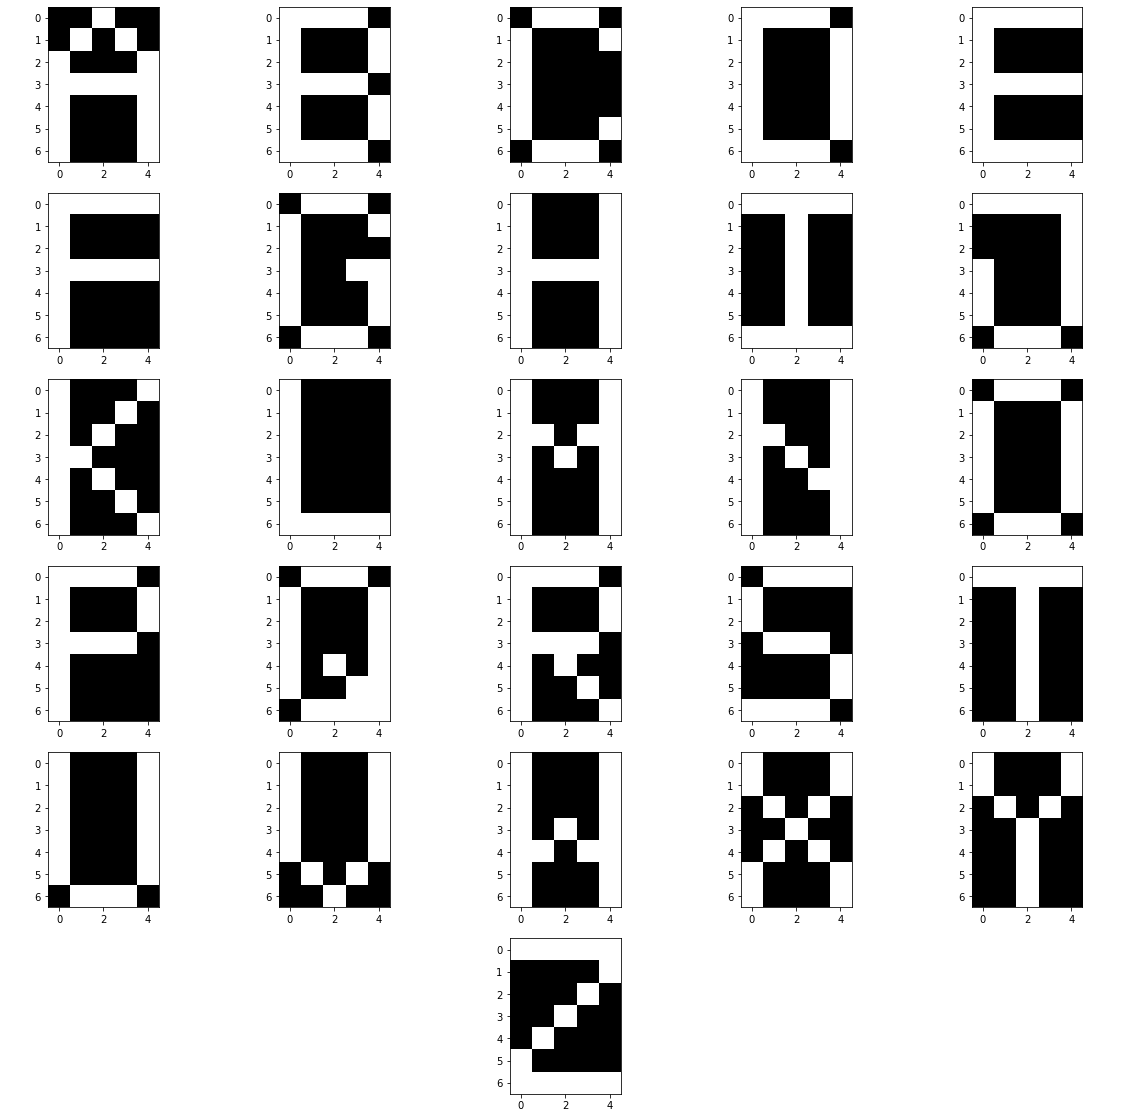

In [ ]:
###############################################
# Displaying all letters at once
###############################################
show_set(clean_letters)

# Let's display one letter at a time. You may use this function for your sandbox needs.

25
[1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1]


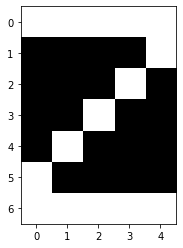

In [ ]:
###############################################
# Randomly display a single letter one at a time
###############################################
i = random.randint(0, 25)
print(i)
print(clean_letters[i])
show_letter(clean_letters[i])

# Task 1 Objectives

You need to create the following functions:
1. `u_gen_rand_hv(D)` which creates a random HV with D dimensions
2. `distance(A,B)` which calculates the distance between HVs A and B
3. `bundle(block)` which bundles a set of random HVs
4. `bind(A,B)` which binds HVs A and B
5. `perm(A,N)` which circular shifts the HV A by N times

Let's set the dimension D in the code block below

In [2]:
###############################################
# NOTE!!! Let's set the dimension D in here
# Let's also calculate the mean, variance and standard dev
###############################################
D    = 1000
mean = D*0.5
var  = D*0.5*0.5
std  = np.sqrt(var)

print("Dimension: %f" % D   )
print("Mean     : %f" % mean)
print("Variance : %f" % var )
print("Std. Dev.: %f" % std )

Dimension: 1000.000000
Mean     : 500.000000
Variance : 250.000000
Std. Dev.: 15.811388


---
# Task 1.1 Create the random HV generator

- Create `u_gen_rand_hv(D):`
- The input is some dimension D (it should be an integer)
- The output must be a HV in the form of an np array containing a random elements of 1s and 0s
- Make sure there are 50% 1s and 50%  0s for the entire dimension
- Assume that D will always be an even number
- Random indexing is a useful technique

In [3]:
###############################################
# Randomly display a single letter one at a time
###############################################
def u_gen_rand_hv(D):

    # Sanity checker
    if (D % 2):
        print("Error - D can't be an odd number")
        return 0
    
    
    # Insert nice code here
    hv_zeros = np.zeros(int(D/2), dtype=int)
    hv_ones = np.ones(int(D/2), dtype=int)
    hv = np.random.permutation(np.concatenate((hv_zeros, hv_ones)))
    return hv

#print(u_gen_rand_hv(D))

# CHECKPOINT 1.1 (2 pts.)
As a quick sanity checker for Task 1.1, the density of 1s must be close to 0.5 of the dimension.

In [4]:
###############################################
# Generate random HVs and check if density is 1
###############################################
magnitude_score = 0

for i in range(50):
  A   = u_gen_rand_hv(D)
  mag = get_mag(A)

  if (mag >= (mean-std*3) and mag <= (mean+std*3)):
    magnitude_score += 1
    print("Magnitude is OK: %f" % mag)
  else:
    print("Magnitude is NOT OK: %f" % mag)
    print("Double check your implementation")

if (magnitude_score == 50):
  print("Magnitude checkpoint passed!")

Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500.000000
Magnitude is OK: 500

---
# Task 1.2 Create the distance calculator

- Create `distance(A,B)`
- The inputs are two HVs A and B
- The output is a single scalar value counting the number of bit differences between A and B
- You might want to checkout the `np.logical_xor()` function

In [5]:
###############################################
# Distance calculation
###############################################
def distance(A,B):
    # Insert nice code here
    distance = np.logical_xor(A,B)
    return np.sum(distance)

hv_A = u_gen_rand_hv(D)
hv_B = u_gen_rand_hv(D)
#print(distance(hv_A,hv_B))

# CHECKPOINT 1.2 (2 pts.)
For task 1.2, the distance between two random HVs needs to be almost close to 0.5 of the dimension. There is some considerable error due to variance but it should be at least (conservatively) 3*std away from the mean.

In [6]:
###############################################
# Check if randomly generated HVs are OK
# Your distance calculation should be good too
# It needs to pass this correctly or else you'll have
# problems later on
###############################################
distance_score = 0

for i in range(50):

  A = u_gen_rand_hv(D)
  B = u_gen_rand_hv(D)
  d = distance(A,B)

  if (d >= (mean-std*3) and d <= (mean+std*3)):
    distance_score += 1
    print("Distance is OK: %f" % d)
  else:
    print("Distance is NOT OK: %f" % d)
    print("Double check your implementation")

if (distance_score == 50):
  print("Distance checkpoint passed!")

Distance is OK: 500.000000
Distance is OK: 498.000000
Distance is OK: 484.000000
Distance is OK: 514.000000
Distance is OK: 508.000000
Distance is OK: 498.000000
Distance is OK: 516.000000
Distance is OK: 518.000000
Distance is OK: 514.000000
Distance is OK: 490.000000
Distance is OK: 488.000000
Distance is OK: 482.000000
Distance is OK: 530.000000
Distance is OK: 504.000000
Distance is OK: 504.000000
Distance is OK: 486.000000
Distance is OK: 512.000000
Distance is OK: 508.000000
Distance is OK: 486.000000
Distance is OK: 518.000000
Distance is OK: 512.000000
Distance is OK: 510.000000
Distance is OK: 472.000000
Distance is OK: 504.000000
Distance is OK: 504.000000
Distance is OK: 500.000000
Distance is OK: 496.000000
Distance is OK: 522.000000
Distance is OK: 504.000000
Distance is OK: 514.000000
Distance is OK: 498.000000
Distance is OK: 498.000000
Distance is OK: 506.000000
Distance is OK: 506.000000
Distance is OK: 496.000000
Distance is OK: 496.000000
Distance is OK: 498.000000
D

---
# Task 1.3 Bundling Operation

- Create `bundle(block)`
- The inputs is a block of HV rows. For example, if we will bundle A, B, and C randomly generated HVs, the block input should consiste of [A,B,C] rows
- The output is a HV in np.array format
- Remember, bundling is the elementwise majority sum. For every element, we sum up the number of 1s. If there are $K$ elements, then the majority threshold is $K/2$. If the number of 1s is more than the majority, then clearly the element should be a 1. If the number of 1s is less then the majority, then the element is a 0.
- Assume that the bundle accepts only odd number for $K$
- You might want to check other options for `np.sum`

In [7]:
###############################################
# Create nice bundle function
###############################################
def bundle(block):

  # sanity checker
  if((len(block) % 2) == 0):
    print("Error! Block size should be odd.")
    return
  np_sum = np.sum(block, axis=0)
  bundle = [0 if x <= (len(block)/2) else 1 for x in np_sum]
  return bundle
  # insert nice code in here

A = u_gen_rand_hv(D)
B = u_gen_rand_hv(D)
C = u_gen_rand_hv(D)
block = np.array([A,B,C])

# CHECKPOINT 1.3 (3 pts.)

There are two key characteristics for the bunlding operations:
1. When you bundle, the output HV also has a density of $0.5D$
2. When you bundle, the constituents are similar to the resulting HV regardless of size $K$. This has a limit though but we won't discuss it here.

The sanity checker below checks both 1 and 2

In [8]:
###############################################
# Checking for magnitude of bundled HVs
###############################################
bun_mag_score  = 0
bun_dist_score = 0

for i in range(50):

  # Generate random HVs
  A = u_gen_rand_hv(D)
  B = u_gen_rand_hv(D)
  C = u_gen_rand_hv(D)

  # Create HV block and bundle
  block = np.array([A,B,C])
  bundled_hv = bundle(block)

  # Get magnitude and check
  mag = get_mag(bundled_hv)

  if(mag >= (mean-std*3) and mag <= (mean+std*3)):
    bun_mag_score += 1
    print("Magnitude is OK: %f" % mag)
  else:
    print("Magnitude is NOT OK: %f" % mag)
    print("Double check your implementation")

  # Get distances
  d1 = distance(A,bundled_hv)
  d2 = distance(B,bundled_hv)
  d3 = distance(C,bundled_hv)

  if (d1 <= (mean+std*3) and d2 <= (mean+std*3) and d3 <= (mean+std*3)):
    bun_dist_score += 1
    print("Bundling is OK - d1 = " + str(d1) + "; d2 = " + str(d2) + "; d3 = " + str(d3))
  else:
    print("Bundling is NOT OK - d1 = " + str(d1) + "; d2 = " + str(d2) + "; d3 = " + str(d3))
    print("Double check your implementation")

if (bun_mag_score == 50):
  print("Bundling magnitude checkpoint passed!")

if (bun_dist_score == 50):
  print("Bundling distance checkpoint passed!")

Magnitude is OK: 491.000000
Bundling is OK - d1 = 257; d2 = 231; d3 = 249
Magnitude is OK: 508.000000
Bundling is OK - d1 = 260; d2 = 258; d3 = 234
Magnitude is OK: 511.000000
Bundling is OK - d1 = 247; d2 = 259; d3 = 233
Magnitude is OK: 499.000000
Bundling is OK - d1 = 247; d2 = 265; d3 = 229
Magnitude is OK: 485.000000
Bundling is OK - d1 = 243; d2 = 259; d3 = 251
Magnitude is OK: 493.000000
Bundling is OK - d1 = 229; d2 = 233; d3 = 277
Magnitude is OK: 511.000000
Bundling is OK - d1 = 255; d2 = 273; d3 = 239
Magnitude is OK: 516.000000
Bundling is OK - d1 = 214; d2 = 284; d3 = 260
Magnitude is OK: 499.000000
Bundling is OK - d1 = 253; d2 = 243; d3 = 243
Magnitude is OK: 497.000000
Bundling is OK - d1 = 257; d2 = 245; d3 = 243
Magnitude is OK: 498.000000
Bundling is OK - d1 = 250; d2 = 240; d3 = 246
Magnitude is OK: 487.000000
Bundling is OK - d1 = 239; d2 = 233; d3 = 241
Magnitude is OK: 500.000000
Bundling is OK - d1 = 262; d2 = 226; d3 = 242
Magnitude is OK: 505.000000
Bundling i

---
# Task 1.4 Binding Operation

- Create `bind(A,B)`
- The inputs are two HVs A and B
- The output is a HV in np.array format
- You might want to checkout the `np.logical_xor()` function
- There's a neat trick here

In [9]:
###############################################
# Create nice binding function
###############################################
def bind(A,B):
  # insert nice code here
  block = np.array([A,B])
  np_sum = np.sum(block, axis=0)
  binded = [0 if (x % 2==0) else 1 for x in np_sum]
  return binded

# Checkpoint 1.4 (2 pts.)
 
Similar to the bundling operation, there are two key characteristics:
1. When you bind, the output HV also has a density of $0.5D$
2. When you bind, the output is dissimilar to its constituents. That means the distance is approximately $D0.5$

The sanity checker below checks both 1 and 2

In [10]:
###############################################
# Checking for magnitude of binded HVs
###############################################

bind_mag_score  = 0
bind_dist_score = 0

for i in range(50):

  # Generate random HVs
  A = u_gen_rand_hv(D)
  B = u_gen_rand_hv(D)

  # Bind the HVs
  binded_hv = bind(A,B)

  # Get magnitude and check
  mag = get_mag(binded_hv)

  if(mag >= (mean-std*3) and mag <= (mean+std*3)):
    bind_mag_score += 1
    print("Magnitude is OK: %f" % mag)
  else:
    print("Magnitude is NOT OK: %f" % mag)
    print("Double check your implementation")

  # Get distances
  d1 = distance(A,binded_hv)
  d2 = distance(B,binded_hv)

  if (d1 >= (mean-std*3) and d1 <= (mean+std*3) and d2 >= (mean-std*3) and d2 <= (mean+std*3)):
    bind_dist_score += 1
    print("Binding is OK - d1 = " + str(d1) + "; d2 = " + str(d2))
  else:
    print("Distance is NOT OK - d1 = " + str(d1) + "; d2 = " + str(d2))
    print("Binding check your implementation")

if (bind_mag_score == 50):
  print("Binding magnitude checkpoint passed!")

if (bind_dist_score == 50):
  print("Binding distance checkpoint passed!")

Magnitude is OK: 508.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 528.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 512.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 504.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 504.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 480.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 482.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 506.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 528.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 492.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 514.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 502.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 494.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 500.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 526.000000
Binding is OK - d1 = 500; d2 = 500
Magnitude is OK: 518.000000
Binding is OK - d1 = 500; d

---
# Task 1.5 Permutation

- Create `perm(A,N)`
- The inputs are an A HV and N number of circular shifts
- The output is a HV in np.array format
- You might want to checkout the `np.roll` function

In [11]:
###############################################
# Create nice permutation function
###############################################
def perm(A,N):
  # insert nice code here
  return np.roll(A,N)


# Checkpoint 1.5 (2 pts.)

The permutation operation, of course wouldn't change its density because we did not tamper with the elements. We just circular shifted. However, the distance between the permuted element and the original should be within $0.5D$ away.

The sanity checker below checks for this.

In [12]:
###############################################
# Checking for magnitude of permuted HVs
###############################################
perm_dist_score = 0

for i in range(1,51):

  # Generate random HVs
  A = u_gen_rand_hv(D)

  # Bind the HVs
  perm_hv = perm(A,i)

  # Get distances
  d = distance(A,perm_hv)

  if (d >= (mean-std*3) and d <= (mean+std*3)):
    perm_dist_score += 1
    print("Permutation is OK - d = " + str(d))
  else:
    print("Permutation is NOT OK - d = " + str(d))
    print("Double check your implementation")

if (perm_dist_score == 50):
  print("Permuting distance checkpoint passed!")

Permutation is OK - d = 526
Permutation is OK - d = 488
Permutation is OK - d = 466
Permutation is OK - d = 500
Permutation is OK - d = 486
Permutation is OK - d = 464
Permutation is OK - d = 502
Permutation is OK - d = 502
Permutation is OK - d = 524
Permutation is OK - d = 502
Permutation is OK - d = 510
Permutation is OK - d = 530
Permutation is OK - d = 502
Permutation is OK - d = 492
Permutation is OK - d = 516
Permutation is OK - d = 510
Permutation is OK - d = 498
Permutation is OK - d = 518
Permutation is OK - d = 494
Permutation is OK - d = 514
Permutation is OK - d = 486
Permutation is OK - d = 502
Permutation is OK - d = 476
Permutation is OK - d = 506
Permutation is OK - d = 510
Permutation is OK - d = 502
Permutation is OK - d = 486
Permutation is OK - d = 486
Permutation is OK - d = 524
Permutation is OK - d = 504
Permutation is OK - d = 496
Permutation is OK - d = 500
Permutation is OK - d = 492
Permutation is OK - d = 492
Permutation is OK - d = 512
Permutation is OK - 

---
# Task 2 HDC Encoding

Great! Congratulations on getting the first 1/3 of this exercise.

This time let's encode our letter images into their own HV representation. We'll guide you through step by step.

**WARNING** From here on, there are no sanity checks. You'll only know if your code works when you get at the end.


---
# Task 2.1 Creating Item Memory (2 pts.)

Create a function `create_item_mem(N,D)`. 
- The input $N$ is the number of randomly generated HVs.
- The input $D$ is the dimension number.
- The output is a dictionary with keys 0 - (N-1), and the items are the HV in np.array format.
- Use the appropriate functions you just created.

In [13]:
###############################################
# Create item memory maker
###############################################
def create_item_mem(N,D):
  # insert nice code here
  hv_blocks = {}
  for index in range(N):
    hv_blocks[index] = np.array(u_gen_rand_hv(D))
  return hv_blocks


Since the base features of our image are the pixels, and we have $7\times 5$ pixel dimensions, then we need $N=35$ random HVs in our item memory.

In [14]:
###############################################
# Create the item memory for CHAR application
###############################################
letter_im = create_item_mem(35,D)

# Feel free to check out your char_im if you like

---
 
# Task 2.2 Create the encoding function (2 pts.)

Create a function `hdc_encode(letter,letter_im,D)`.
- The input is a letter image vector in np.array format
- The letter_im is the item memory for the letter. Each entry in the IM represents the pixel location of the letter.
- The other input $D$ is the dimension
- The output is the HV representing the letter.

Here's a pseudo code:
1. Initialize some empty HV with zeros spanning the dimension $D$.
2. Initialize an empty block (make it a list first). This is where we will dump all the encoded pixel HVs.
3. Begin iterating through a for loop, all the elements in the letter vector
4. Retrieve the pixel HV from the memory that is mapped to the given pixel-location
5. For that given pixel, check if it is a white pixel or black pixel. If the pixel is white circular shift the element once; otherwise, if it's black, retain the pixel HV
6. Save the encoded pixel HV into the block.
7. Repeats step 3-6 until the last pixel position
8. Bundle the block
9. Return the bundled HV

Note: the circular permutation represents if the binary pixel is either a 1 or a 0

In [15]:
###############################################
# Create HDC encoder
###############################################
def hdc_encode(letter, letter_im, D):
  # Insert nice code here
  block = []
  for idx, i in enumerate(letter):
    if (i==1): 
      block.append(perm(letter_im[idx],1))
      #block.append(idx)
    else: 
      block.append(letter_im[idx])
  # print(block)
  # print("------------------------")
  return block
  
  #return bundle(block)

You can visually inspect if you got the desired result.

In [16]:
###############################################
# Checker. Go ahead and change the index of the clean_letters
###############################################
check_hdc_encode = hdc_encode(clean_letters[0],letter_im,D)

print(check_hdc_encode)

[array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0

Since the CHAR data set is the "perfect" set already, we can use the encoded letters and save it into an associative memory. The code below creates an AM dictionary where it simply maps the encoded letters.

In [17]:
###############################################
# Worked this out for you hehe. Creating an associative memory
###############################################
keys = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

letter_am = dict()

for i in range(len(keys)):
  letter_am[keys[i]] =  hdc_encode(clean_letters[i],letter_im,D)


---
# Task 2.3 Create a similarity search (2 pts.)

Since we now have an associative memory and the encoding function. We can proceed to "testing" our device. But first, you need to create a `similarity_search(letter,letter_im,latter_am,D)` function.

- The letter input is the test letter for checking.
- The letter_im is the item memory. We'll use it to call the encode function inside the similarity search.
- The letter_am is the associative memory dictionary. We'll use it for finding the similarity.
- The $D$ is the number of dimensions.

There are two outputs. First is the predicted letter, and second is the similarity score.

Here's a pseudo-code:
1. Intiialize some sim_score = 10000 (we'll use this for comparing later)
2. Initialize the sim_letter = '0' (we'll use this for saving the last known closest letter)
3. Encode the letter to a test_hv. Use the `hdc_encode` function.
4. Initialize iterating through all entries in the AM dictionary
5. Calculate a temp_score to be the distance between the test_hv and the letter_hv in the dictionary being tested.
6. Compare if the temp_score is less than sim_score. If yes then replace the old sim_score with the new temp_score and replace the old sim_letter with the new letter.
7. Repeat steps 5 and 6 until we reach letter Z
8. Return sim_letter, sim_score

If you have difficulty understanding this, please contact your instructor.

In [18]:
###############################################
# Similarity search function
###############################################
def similarity_search(letter,letter_im,letter_am,D):
  sim_score = 10000
  sim_letter = '0'
  test_hv = hdc_encode(letter, letter_im, D)
  idx = 0
  for entry in letter_am:  
    temp_score=0  
    for loc, pixel in enumerate(letter_am[entry]):
      temp_score += distance(pixel,test_hv[loc])
    if (temp_score < sim_score):
      sim_score = temp_score
      sim_letter = entry
  return sim_letter,sim_score
similarity_search(clean_letters[1],letter_im,letter_am,D)

('b', 0)

# Checkpoint Task 2 (1 pts.)

Based on the original paper of this work, we can immediately test the associative memory with the clean_letters data set. If you worked on the `hdc_encode` and `similarity_search` correctly, you should get a 100% accuracy in the checker below.

We defined a function `test_model(test_data,correct_values,letter_im,letter_am,D,print_flag)`
- The test_data is the set of data to be tested
- The correct_values are the ground truth. If it matches then it's correct.
- The letter_im is the item memory
- The letter_am is the associative memory
- The $D$ is the dimension
- The print_flag is just a mode if you want to log the status of the checker



In [19]:
###############################################
# Model testing function
###############################################
def test_model(test_data,correct_values,letter_im,letter_am,D,print_flag):
 # Simply iterate through all elements in the clean_letters set
  score = 0
  test_len = len(test_data)
  for i in range(test_len):
    sim_letter, sim_score = similarity_search(test_data[i],letter_im,letter_am,D)
    if sim_letter == correct_values[i]:
      score += 1
      if(print_flag):
        print("CORRECT prediction! sim_letter: " , sim_letter , " sim_score: ",  str(sim_score))
    else:
      if(print_flag):
        print("WRONG prediction! sim_letter: " , sim_letter , " sim_score: " , str(sim_score))

  print("Final accuracy is: %f" % (score/test_len*100))
  return (score/test_len*100)

In [ ]:
###############################################
# Testing our model to the ground truth
###############################################
test_model(clean_letters,keys,letter_im,letter_am,D,True)

CORRECT prediction! sim_letter:  a  sim_score:  0
CORRECT prediction! sim_letter:  b  sim_score:  0
CORRECT prediction! sim_letter:  c  sim_score:  0
CORRECT prediction! sim_letter:  d  sim_score:  0
CORRECT prediction! sim_letter:  e  sim_score:  0
CORRECT prediction! sim_letter:  f  sim_score:  0
CORRECT prediction! sim_letter:  g  sim_score:  0
CORRECT prediction! sim_letter:  h  sim_score:  0
CORRECT prediction! sim_letter:  i  sim_score:  0
CORRECT prediction! sim_letter:  j  sim_score:  0
CORRECT prediction! sim_letter:  k  sim_score:  0
CORRECT prediction! sim_letter:  l  sim_score:  0
CORRECT prediction! sim_letter:  m  sim_score:  0
CORRECT prediction! sim_letter:  n  sim_score:  0
CORRECT prediction! sim_letter:  o  sim_score:  0
CORRECT prediction! sim_letter:  p  sim_score:  0
CORRECT prediction! sim_letter:  q  sim_score:  0
CORRECT prediction! sim_letter:  r  sim_score:  0
CORRECT prediction! sim_letter:  s  sim_score:  0
CORRECT prediction! sim_letter:  t  sim_score:  0


100.0

Of course you might wonder, "Obviously we'll get the same since we encoded the same!" That's the thing though, you were able to get the exact same encoding hence it should make sense that you get the sim_score of 0 indicating that it is the exact same encoding. Though it was not shown, the scores for other letters won't be at 0! You can tinker around a bit if you like.

In [ ]:
###############################################
# Sandbox Area
###############################################





###############################################

---
# Task 3 Analysis

This part is more of an analysis. We'll code most of this but it is your job to understand what we want to get out of this.

First we'll make a `distort_img(image,N)` function that distorts the images by flipping some pixels.
- The image input is the clean letter image
- $N$ here is the number of distortions

In [20]:
###############################################
# Distoring images - AKA adding controlled noise
###############################################
def distort_img(image,N):

  # Since we know we have 35 pixels only
  # We can do random indexing for this part
  rand_idx = [x for x in range(35)]
  random.shuffle(rand_idx)

  # Initialize some empty image to avoid referencing issues
  ret_img = np.zeros(35)

  for i in range(35):
    
    # if the random idx is in the distortion list
    # let's flip bits
    if(rand_idx[i] < N):
      if(image[i] == 0):
        ret_img[i] = 1
      else:
        ret_img[i] = 0
    else:
      ret_img[i] = image[i]

  return ret_img


Let's test it out on some numbers. Go ahead and play around N_distortions parameter. What do you notice?

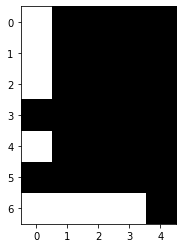

In [21]:
###############################################
# Testing distortions
###############################################

# Change me!
N_disortions = 3

# Get random letter
test_idx = random.randint(0,25)

# Add distortions
test_distort = distort_img(clean_letters[test_idx],N_disortions)

# Show letter
show_letter(test_distort)

This time let's try to see how our model fairs if we test out variations with different distortions. To make it a control setup, we'll fix the variations manually. Here's the strategy:

1. We'll create $M$ repetitions with $N$ distortions of each clean letter.
2. We'll need to save the correct outputs for comparison later.
3. Let's get the accuracy for each setting.

We define a function `create_test_set(clean_letters, M,N)`. The arguments should be clear.

In [22]:
###############################################
# Variations and testing
###############################################

def create_test_set(clean_letters, M, N):

  labels = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

  # Initialize empty lists
  test_data = []
  test_answers = []

  for i in range(len(clean_letters)):
    for j in range(M):
      test_data.append(distort_img(clean_letters[i],N))
      test_answers.append(labels[i])

  return test_data, test_answers


Let's try our setup out! Feel free to modify N_distortions, M_repetitions, and the display_log.

**WARNING** Keep the M_repetitions to a maximum of 100. It takes long to simulate the data. 50 repetitions is just right. If you think the simulations take too long. Don't panic. It will eventually finish.

In [23]:
###############################################
# Testing out distortions
###############################################

# Tunable parameters
N_distortions = 5
M_repetitions = 50
display_log   = False

# First create the test data
test_data, test_answers = create_test_set(clean_letters, M_repetitions ,N_distortions)

# Test using our model earlier
test_model(test_data,test_answers,letter_im,letter_am,D,display_log)

Final accuracy is: 90.461538


90.46153846153845

# Checkpoint Task 3 (2 pts.)

Great! Now for the last exercise. For M_repetitions = 50. Fill in the table below. You are free to use a sandbox.



In [25]:
###############################################
# Sandbox Area
###############################################
# Tunable parameters

M_repetitions = 50
display_log   = False
accuracies = {}
for i in range(9):
  # First create the test data
  N_distortions = i
  test_data, test_answers = create_test_set(clean_letters, M_repetitions ,N_distortions)

  # Test using our model earlier
  result = test_model(test_data,test_answers,letter_im,letter_am,D,display_log)
  accuracies[i] = result

print(accuracies)
###############################################

Final accuracy is: 100.000000
Final accuracy is: 98.769231
Final accuracy is: 98.000000
Final accuracy is: 95.384615
Final accuracy is: 94.461538
Final accuracy is: 90.923077
Final accuracy is: 88.153846
Final accuracy is: 81.538462
Final accuracy is: 75.000000
{0: 100.0, 1: 98.76923076923076, 2: 98.0, 3: 95.38461538461539, 4: 94.46153846153847, 5: 90.92307692307692, 6: 88.15384615384615, 7: 81.53846153846153, 8: 75.0}


N_distortions      | Accuracy         | 
-------------------|------------------|
0                  |      100         |
1                  |  98.769231               |
2                  |98.000000                  |
3                  |95.384615             |
4                  |94.461538                |
5                  |90.923077                 |
6                  |88.153846                |
7                  |81.538462                |
8                  | 75.000000              |

Finally, answer the following question:

So what are your thoughts about HDC? Feel free to express your ideas 😃

It's very impressive with how accurate it is even with a noisy data set considering how straight-forward and simple the algorithm is. 

# Final Message

Thank you for working hard to get this far! You deserve a cookie. Hope you had fun in CoE 161!